<a href="https://colab.research.google.com/github/jhuarancca/HealthcareArtificialntelligenceProjects/blob/main/DataProcessingInPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas is perhaps the most ubiquitous library in Python for data analysis. Built upon the powerful Numpy library, Pandas provides a fast and flexible data structure in Python for handling real-world datasets. Raw data is often presented in tabular form, shared using the .csv file format. Pandas provides a simple interface for importing these .csv files into a data structure known as DataFrames that makes it extremely easy to manipulate data in Python.

All the datasets will be uploaded to the colab Notebooks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
df = pd.read_csv("raw_data.csv")

Once the data is imported as a DataFrame, we can easily perform data preprocessing on it. Let's work throught it using the Iris flower dataset. The Iris flower dataset is a commonly used dataset that contains data on the measurements (sepal length and width, petal length and width) of serveral classes of flowers. 

First let's import the dataset as provided for free by University of California Irvine (UCI).

Pandas is able to improt a dataset directly from a URL.

In [ ]:
URL = \
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
import pandas as pd
df = pd.read_csv(URL, names=['sepal_length','sepal_width','petal_length','petal_width', 'class'])

Now that it is in a DataFrame, we can easily manipulate the data. First, let's get a summary of the data as it is always important to know what kind of data we are working with.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


It looks like there are 150 rows in the dataset with four numeric columns containing information regarding the sepal_length and sepal width, along with petal_length and petal_width. Thre is also one non-numeric column containing information regarding the class (that is, species ) of the flowers

We can get a quick statistical summary of the 4 numeric columns by calling the describe() function.

In [ ]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# Now let's take a look the first 10 rows of the data
print(df.head(10))

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


Pandas also allows us to perform data wrangling easily. For example, we can do the following to filter and select rows with sepal_length greater than 5.o

In [ ]:
df2 = df.loc[df['sepal_length'] > 5.0, ]


In [ ]:
print(df2)

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
14            5.8          4.0           1.2          0.2     Iris-setosa
15            5.7          4.4           1.5          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[118 rows x 5 columns]


The loc command allows us to access a group of rows and columns.

**Data Visualization**

EDA is perhaps one of the most important steps in the machine learning workflow, and pandas makes it extremely easy to visualize data in python. Pandas provides a high-level API for the popular matplotlib library, which makes it easy to construct plots directly from DataFrames.


As an example, let's visualize the iris dataset using pandas to uncover inportant insights. Let's plot a scatterplot to visualize how sepal_width, is related to sepal_length. We can construct a scatterplot easily using the DataFrame.plot.scatter() method which is built into all DataFrames.

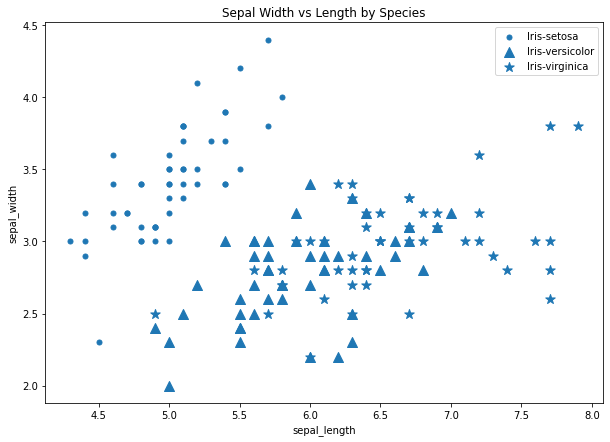

In [ ]:
# Define marker shapes by class.
import matplotlib.pyplot as plt

marker_shapes = ['.','^','*']
#Then, plot the scatter plot
ax = plt.axes()
for i, species in enumerate(df['class'].unique()):
    species_data = df[df['class'] == species]
    species_data.plot.scatter(x='sepal_length',
                              y='sepal_width', 
                              marker=marker_shapes[i],
                              s=100,
                              title="Sepal Width vs Length by Species", 
                              label=species, figsize=(10,7), ax=ax)

From the scatterplot we can notice some interesting insights. First the relationship between sepal_width and sepal_length is dependent on the species. Setosa (dots) has a fairly linear relationship between sepal_width and sepal_length, while versicolor (triangle) and virginica (star) tends to have much greater sepal_length than Setosa. If we are designing a machine learning algorithm to predict the type of species of flower, we know that the sepal_Width and sepal_length are important features to include in our model.

Now we will plot a histogram to investigate the distribution. Consistent with scatterplots, pandas DataFrames provides a built in method to plot histograms using the DataFrame.plot.hist() function.

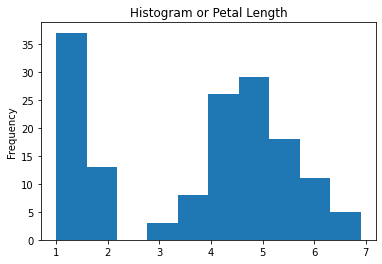

In [ ]:
df['petal_length'].plot.hist(title='Histogram or Petal Length')

We can see that the distribution of petal lengths is essentially bimodal. It appears that certain species of flowers have shorter patals than the rest. We can also plot a boxplot of the data. The boxplot is an important data visualization tool used by data scientists to understand the distribution of the data based of the first quartile, median and the third quatile.

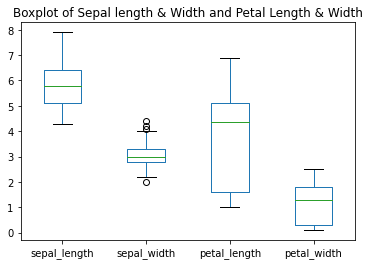

In [ ]:
df.plot.box(title='Boxplot of Sepal length & Width and Petal Length & Width')

From the boxplot we can see that the variance of sepal_width is much smaller than the other numeric variables with petal_length having the reatest variance. 

**Data Proprocessing in pandas**

Lastly, let's take a look at how we can use pandas for data preprocessing, specifically to encode categorical variables and to impute missing values.

Encoding categorical variables

In machine learning projects, it is common to receive datasets with categorical variables. Here are some examples.

1.   Gender: Male and female
2.   Day: Monday, Tuesday, Wednesday, thursday and Friday
1.   Country: USA, UK, China and Japan.


Machine learning algorithms such as neural networks are unable to work with such categorical variables as they expect numerical variables. Therefore, we need to perofrm preprocessing on these variables before feeding them into a machine learning algorithm.


One common way to convert these cateorical variables into numerical varaibles is a technique known as one-hot encoding, implemented by the get_dummies() function in pandas. One-hot encoding is a process that converts a categortical variable with n categories into n distinct binary features.

Essentially, the transformed features are binary feaures with a 1 value of it represents the original feature and 0 otherwise. As you can imagein, it would be a hassle to write the code for this manually. Fortunately pandas has a handy function that does exactly that. First, let's create a DataFrame in pandas using the data in the following table:






In [ ]:
df2 = pd.DataFrame({'Day': ['Monday','Tuesday','Wednesday',
                           'Thursday','Friday','Saturday',
                           'Sunday']})


NameError: ignored

In [ ]:
print(df2)

         Day
0     Monday
1    Tuesday
2  Wednesday
3   Thursday
4     Friday
5   Saturday
6     Sunday


To one-hot encode the above categorical feature using pandas. It is as simple as calling the function.

In [ ]:
print(pd.get_dummies(df2))

**Imputing missing values**


As discussed earlier, imputing missinv values is an esstial part of the machine learning workflow. Real-world datasets are messy and usually contain missing values. Most machine learning models such as neural netwrks are unable to work with missing data, and hence we ahave to preprocess the data before we feed the data into our models. Pandas makes it very easy to handle missing values.

Let's use the Iris dataset. The iris dataset does not have nay mussing values by default. Therefore, we have to delete some of them in purpose for the sake of this excercise. We will randonly select 10 rows in the dataset adn deletes the sepal_legth values in these 10 rows.

In [ ]:
import numpy as np
URL =    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
import pandas as pd
df = pd.read_csv(URL, names=['sepal_length','sepal_width','petal_length','petal_width', 'class'])
# Randomly select 10 rows

In [ ]:
random_index = np.random.choice(df.index, replace=False, size=10)
#Set the sepal_length values of these rows to be None
df.loc[random_index, 'sepal_length']= None

Let;s use this modified dataset to see how we can deal with missing values. First let's check our missing values

In [ ]:
print(df.isnull().any())

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool


Unsurprisingly, pandas tells us that there are missing values that is null values in the sepal_length column. This command is usefil to find out wich columns in our datasets contains missing values.


One way to deal with missing values is to simply remove any rows iwth missing values. Pandas provides a handy dropna function for us to do that.


In [ ]:
print("Number of rows before deleting: %d" % (df.shape[0]))
df2 = df.dropna()
print("Number of rows after deleting: %d" % (df2.shape[0]))


Number of rows before deleting: 150
Number of rows after deleting: 150


Another way is to replace the missing sepal_length values with the mean of the non-missing sepal_length values:

In [ ]:
df.sepal_length = df.sepal_length.fillna(df.sepal_length.mean())

In [ ]:
print(df.sepal_length)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64


With the missing values handled we can then pass the DataFrame to machine learning models.